# Detección Iris y Pupilas

In [5]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
print(cv.__version__)

4.0.1


## Carga de la Imagen

In [9]:
img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = cv.medianBlur(gray,5)

cv.imshow('Ojos con Heterocromia',gray)
cv.waitKey(0)
cv.destroyAllWindows()

##  Detección de Iris

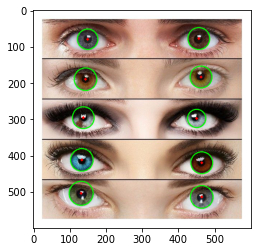

In [46]:
# Utilizando el código de base para la detección de círculos, se modifican los parámetros de la función
# Para quedarnos únicamente con el Iris.

img_out = img.copy()
iris = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=5,param1=200,param2=21.45,minRadius=20,maxRadius=34)
iris = np.uint16(np.around(iris))

for i in iris[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    
color_iris = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)
plt.imshow(color_iris)
plt.show()

In [79]:
# Calculo de distancia de Iris
print(iris.shape)

def circles_distance(iris):
    loc = iris[0,:,1]
    loc = np.argsort(loc, axis=0)
    iris = iris[:,loc,:]
    distancias = []
    coordenadas = []
    for i, elem in enumerate(iris[0,:]):
        if i%2==0:
            a = np.array((iris[0,i+1, 0],iris[0,i+1, 1]))
            b = np.array((iris[0,i, 0],iris[0,i, 1]))
            dist = np.linalg.norm(a-b)
            distancias.append(dist)
            coordenadas.append((a, b))
    return distancias, coordenadas
            
dist_iris, coord_iris = circles_distance(iris)
print(dist_iris)
print(coord_iris)

(1, 10, 3)
[65230.00003066074, 65218.00027599742, 312.00641019056, 330.0969554539999, 332.150568266863]
[(array([150,  80], dtype=uint16), array([456,  78], dtype=uint16)), (array([144, 190], dtype=uint16), array([462, 184], dtype=uint16)), (array([450, 298], dtype=uint16), array([138, 296], dtype=uint16)), (array([464, 420], dtype=uint16), array([134, 412], dtype=uint16)), (array([464, 514], dtype=uint16), array([132, 504], dtype=uint16))]


## Detección de Pupilas

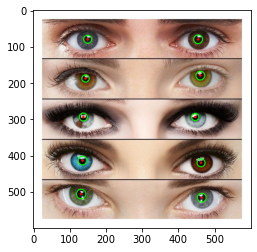

In [80]:
# Se usa el mismo procedimiento pero para las pupilas. 

img_out = img.copy()
pupilas = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=5,param1=160,param2=18,minRadius=8,maxRadius=18)
pupilas = np.uint16(np.around(pupilas))

for i in pupilas[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    

color_pupilas = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)
plt.imshow(color_pupilas)
plt.show()

In [81]:
# Calculo de distancia de Pupilas

dist_pup, coord_pup = circles_distance(pupilas)
print(coord_pup)
print(dist_pup)

[(array([150,  80], dtype=uint16), array([454,  80], dtype=uint16)), (array([144, 188], dtype=uint16), array([460, 180], dtype=uint16)), (array([138, 294], dtype=uint16), array([446, 294], dtype=uint16)), (array([462, 420], dtype=uint16), array([136, 414], dtype=uint16)), (array([464, 516], dtype=uint16), array([132, 506], dtype=uint16))]
[65232.0, 65220.00049064704, 65228.0, 326.0552100488505, 332.150568266863]
